# Load in packages

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action="ignore", category= FutureWarning)

# Read in dataset

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv') # read in data
df = df.drop("Unnamed: 0", axis = 1)

<hr>

# Objective 1
## Business Understanding:
<hr>

### A) Describe the purpose of the data set you selected (why was it collected in the first place?).

#### - The data (fictional) is comprised of scores from three tests of students at a public school along with a variety of personal and socio-economic factors which may contain interaction effects. 

#### - We assume that this data was collected to identitfy potential relationships between personal and socio-economic factors that could help to predict and better understand which factors affect test scores most. With this knowledge educators, parents and students can focus their attention towards variables which can potentially help students earn higher testing scores.  

### B) Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 

#### - The importance of student education and testing scores are of the utmost importance. Education is the foundation upon which students will build their future on. If we are able to identify factors that could assist in making a more efficient learning and testing experiece it will impact the future positively for many students.

#### - We will know if we have mined useful knowledge from the dataset if we are able to identify patterns and significant relationships that help us in identifying student performance factors.


### C) How would you measure the effectiveness of a good prediction algorithm? Be specific. 

#### - A good prediction algorithm will be one that not only allows us to accurately predict test scores for given inputs, but one that will allow us to obtain interpreable results that we can use to better understand to what extent each factor has an effect on testing scores. Understanding which key relationships that lie within our data will help staff, family, and students identify actionable opportunitites in which interventions and support can be provided.

<hr>

# Objective 2

## Data Understanding

<hr>

In [4]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


Notes on data from Head function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


In [7]:
len(df.columns)

14

### A) Describe the meaning and type of data (Scale, Values, etc.) for each attribute in the data file.

### Meaning: 

    1) Gender: Gender of the student (male/female)
    2) EthnicGroup: Ethnic group of the student (group A to E)
    3) ParentEduc: Parent(s) education background (from some_highschool to master's degree)
    4) LunchType: School lunch type (standard or free/reduced)
    5) TestPrep: Test preparation course followed (completed or none)
    6) ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
    7) PracticeSport: How often the student parctice sport (never/sometimes/regularly))
    8) IsFirstChild: If the child is first child in the family or not (yes/no)
    9) NrSiblings: Number of siblings the student has (0 to 7)
    10) TransportMeans: Means of transport to school (schoolbus/private)
    11) WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
    12) MathScore: math test score(0-100)
    13) ReadingScore: reading test score(0-100)
    14) WritingScore: writing test score(0-100)


###  Un-changed (raw) data type:
    1) Gender: object
    2) EthnicGroup: object
    3) ParentEduc: object
    4) LunchType: object
    5) TestPrep: object
    6) ParentMaritalStatus: object
    7) PracticeSport: object
    8) IsFirstChild: object
    9) NrSiblings: float64
    10) TransportMeans: object
    11) WklyStudyHours: object
    12) MathScore: int64
    13) ReadingScore: int64
    14) WritingScore:int64
    
    object = column containing a python object such as strings, lists, or dictionaries.
    int64 = column containing integer values
    float64 = column containing floating-point values (decimal numbers)

### B) Verify the data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be. Specific.

#### - Missing Values:


In [8]:
# missing data
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
# percentage of missing data
100 * df.isnull().sum() / len(df)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [10]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [11]:
percent_nan = percent_missing(df)

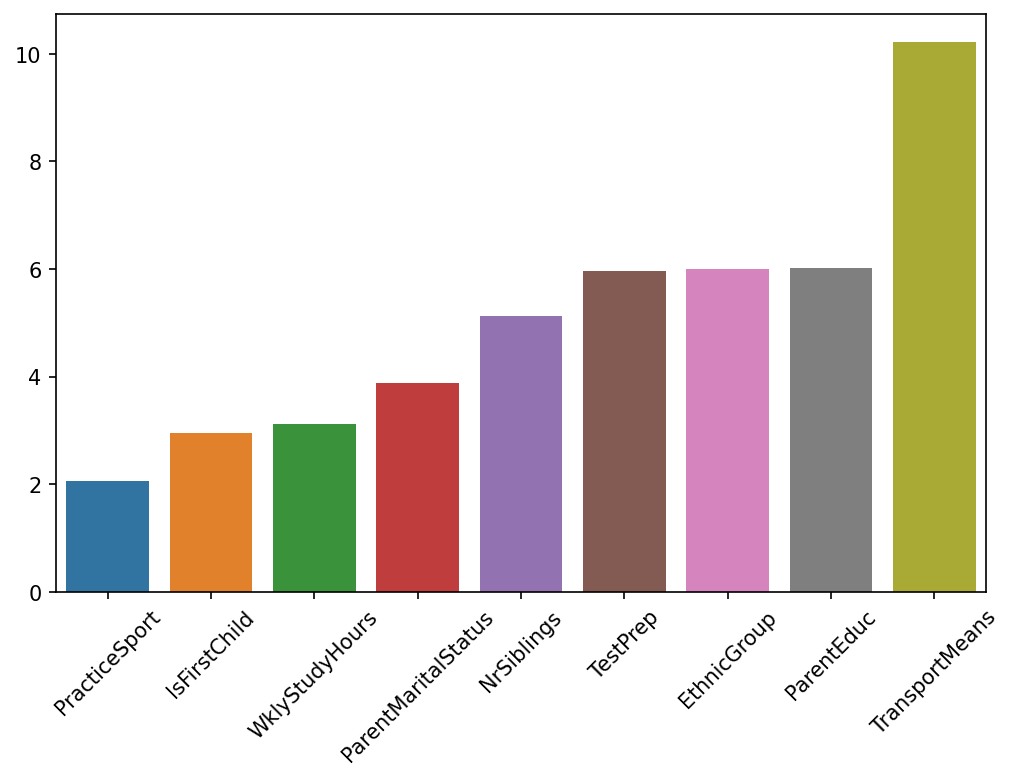

In [12]:
# plot of missing data (percentage) 
plt.figure(figsize= (8,5), dpi = 150)
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 45);

#### - Duplicate Data

We do not appear to have duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

In [13]:
duplicate_sum = df.duplicated().sum()
print("Total Duplicated Rows", duplicate_sum)

duplicate_sum_column = df.duplicated(). sum(axis =0)
print("Total Duplicated Columns", duplicate_sum_column)

Total Duplicated Rows 0
Total Duplicated Columns 0


#### - Outliers

### C) Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found somthing interesting. 

#### Explain the significance of the statistics run and why they are meaniningful. 

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


#### Metrics Defined

   - **Range**: The range is the difference between the highest and the lowest values in a dataset. It gives an indication of how spread out the data is.

   - **Mode**: The mode is the value that appears most frequently in a dataset. It represents the most common or typical value in the data.

   - **Mean**: The mean is the average of all values in a dataset. It is calculated by summing up all the values and dividing by the number of values.

   - **Median**: The median is the middle value of a dataset when it is ordered from lowest to highest (or highest to lowest). It is used as a measure of central tendency when the dataset contains outliers or is not normally distributed.

   - **Standard Deviation**: The standard deviation is a measure of the spread or dispersion of a dataset. It represents how much the values in a dataset vary from the mean. A higher standard deviation indicates a larger spread of the data.

   - **Min**: The minimum value is the smallest value in a dataset.

   - **25%**: The 25th percentile, also known as the first quartile, is the value below which 25% of the data falls.

   - **50%**: The 50th percentile, also known as the median, is the middle value of the dataset.

   - **75%**: The 75th percentile, also known as the third quartile, is the value below which 75% of the data falls.

   - **Max**: The maximum value is the largest value in a dataset.

   - **Count**: The count is the total number of values in a dataset.

#### Calculated Metrics For Our Data
- **Range**:
- **Mode**:
- **Mean**:
- **Median**:
- **Standard Deviation**:
- **Min**:
- **25%**:
- **50%**: 
- **75%**:
- **Max**:
- **Count**:

### D) Visualize the most important attributes appropriately (at least 5). 
 
 *provide an interpretation for each chart*

  *explain why each visual is appropriate.* 

<Axes: >

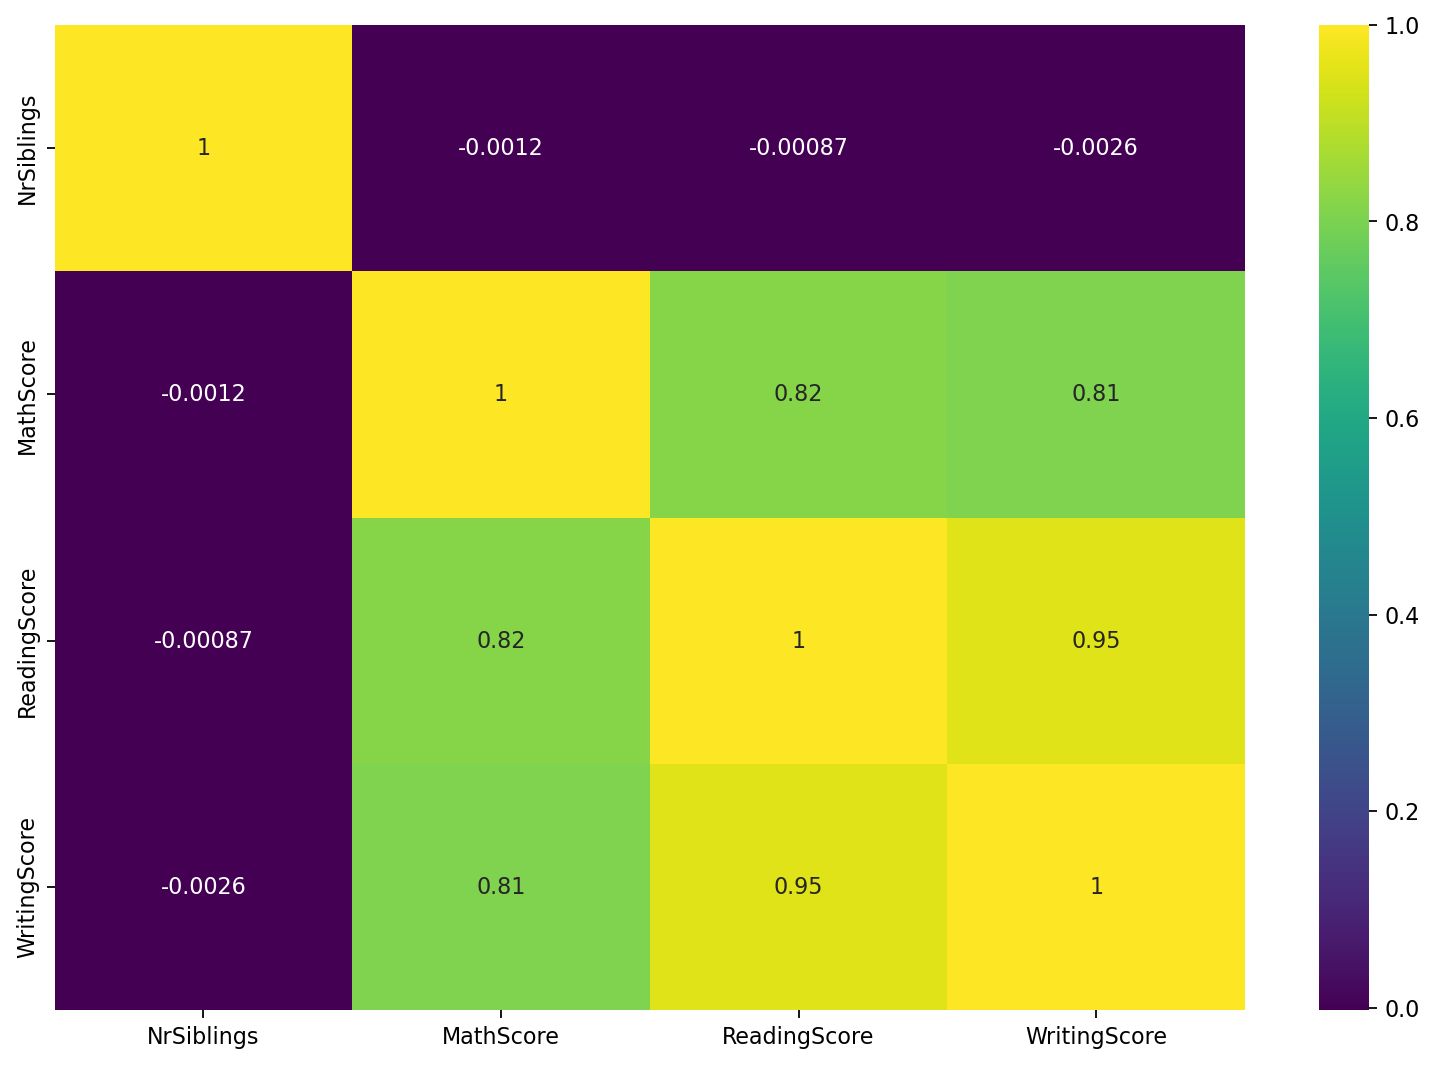

In [16]:
# raw data corr viz. 
plt.figure(figsize=(12,8), dpi=160)
sns.heatmap(df.corr(), cmap = "viridis", annot=True)

### E) Explore relationships between attributes: look at the attributes via scatterplot, correlation, cross-tabulation, group-wise averages, etc. as appropriate.

*explain any interesting relationships*

### F) Are there other features that could be added to the data or created from existing features? which ones? 

## BONUS

#### Provide additional analyses. 
*one idea, implement dimensinoality reduction, then visualize and interpret the results.*